In [1]:
# Imports
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import logistic as lgtc
import clef as clf
import hill
import damex as dmx
import peng as pg
import clef_asymptotic as clf_as
import utilities as ut
import hydro_map as hm

# Load data

In [2]:
X = np.load('data/hydro_data/raw_discharge.npy')
V = ut.rank_transformation(X)
n, dim = V.shape

# Split train/test

In [3]:
V_train, V_test = train_test_split(V, test_size=0.1)
n_train, n_test = V_train.shape[0], V_test.shape[0]

## Extreme points

In [4]:
R = 100
V_train_bin = ut.above_radius_bin(V_train, R)
print(f'nb extreme points train = {V_train_bin.shape[0]}')
V_test_bin = ut.above_radius_bin(V_test, R)
print(f'nb extreme points test = {V_test_bin.shape[0]}')

nb extreme points train = 2386
nb extreme points test = 288


# CLEF

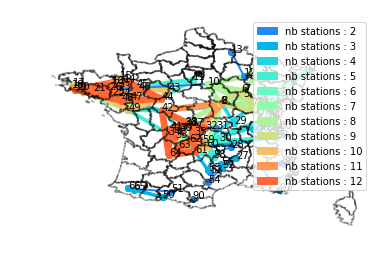

nb maximal faces = 61
average dist to clef faces = 0.6022590943738637


In [5]:
faces_clf = clf.clef(V_train, R, kappa_min=0.2)
hm.map_visualisation(faces_clf, dim)  # visualization of the groups of gauging stations on french map
print(f'nb maximal faces = {len(faces_clf)}')
print(f'average dist to clef faces = {ut.levenshtein_faces_radius(faces_clf, R, V_test)}')

# Hill

In [6]:
k = int(n_train/R - 1)
delta = 0.05
faces_hill = hill.hill(V_train, delta, k)
#hm.map_visualisation(faces_hill, dim)  # visualization of the groups of gauging stations on french map
print('nb maximal faces:', len(faces_hill))
print(f'average dist to hill faces = {ut.levenshtein_faces_radius(faces_hill, R, V_test)}')

nb maximal faces: 74
average dist to hill faces = 0.6899259614541846


# DAMEX

In [7]:
eps = 0.3
nb_min = 5
faces_dmx = dmx.damex(V_train, R, eps, nb_min)
#hm.map_visualisation(faces_dmx, dim)  # visualization of the groups of gauging stations on french map
print(f'nb faces: {len(faces_dmx)}')
print(f'average dist to damex faces = {ut.levenshtein_faces_radius(faces_dmx, R, V_test)}')

nb faces: 19
average dist to damex faces = 0.7373966887503717


# Peng

In [8]:
k = int(n_train/R - 1)
delta_p = 0.3
faces_peng = pg.peng(V_train, delta_p, k, rho_min=0.05)
#hm.map_visualisation(faces_peng, dim)  # visualization of the groups of gauging stations on french map
print(f'nb maximal faces: {len(faces_peng)}')
print(f'average dist to peng faces = {ut.levenshtein_faces_radius(faces_peng, R, V_test)}')

nb maximal faces: 191
average dist to peng faces = 0.604420859455217


# CLEF asymptotic

In [9]:
kappa_as_min = 0.3
delta_k = 0.05
faces_clf_as = clf_as.clef_as(V_train, delta_k, k, kappa_as_min)
#hm.map_visualisation(faces_clf_as, dim)  # visualization of the groups of gauging stations on french map
print(f'nb maximal faces: {len(faces_clf_as)}')
print(f'average dist to peng faces = {ut.levenshtein_faces_radius(faces_clf_as, R, V_test)}')

nb maximal faces: 96
average dist to peng faces = 0.6303814314127552
